## Renewable Energy Linear Regression Project

### Data Set

Dataset contains renewable energy consumption as a percentage of total energy consumption for countries and regions.
Original dataset contained data from 1960 to 2023, however all years until 1990 were empty so years 1960 - 1989 were removed. This was also the case with the year 2023.
Dataset obtained from World Bank Group, available here: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?.

Dataset contains a column holding the countries and regions, and columns representing the year of the data.

### Findings

From performing operations on this data set, I have found that a linear regression model fits the data accurately for many of the countries and regions. 
For example, linear regression fits accurately on the data for Denmark.
There are countries however where this model does not work, such as Azerbijan.

This information could still be uselful, as countries that do not fit a linear model can be compared to see similarities that are perhaps the cause of the volatile nature of their renewable energy consumption.
Similarly, countries that the linear regression model works for can be compared to establish similarities between countries that have seen linear growth in renewable energy consumption, and similarities between countries that have seen linear decline in renewable energy consumption.

In [60]:
# import all required libraries

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display


In [98]:
# read data from file

df = pd.read_csv('renewableEnergyConsumption.csv')

In [62]:
# dropdown to select what country to view data from

country_dropdown = widgets.Dropdown(
    options = sorted(df.iloc[:, 0].unique()),
    description = 'Target:',
    disabled = False,
)

display(country_dropdown)

Dropdown(description='Target:', options=('Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Cen…

In [113]:
# reshape x axis to be a 2D array for scikit-learn operations
# get data values as a NumPy array
# remove any data entries containing null values

selected_country = country_dropdown.value

x = df.columns[1:].astype(int).values
y = df[df.iloc[:, 0] == selected_country].iloc[:, 1:].values.flatten()

valid_indices = ~np.isnan(y)

x = x[valid_indices].reshape(-1, 1)
y = y[valid_indices]


In [114]:
# randomly select data to split into training and test data, 70% training data, 30% test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [115]:
# fit linear regression model 
# predict values for line of best fit

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

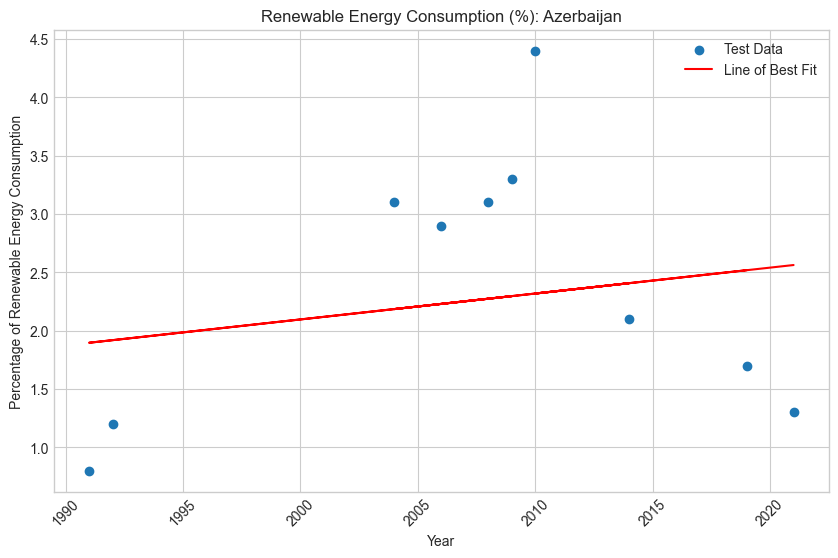

In [116]:
# plot data points and line of best fit

plt.figure(figsize = (10, 6))
plt.scatter(x_test, y_test, label = 'Test Data')
plt.plot(x_test, y_pred, color = 'red', label = 'Line of Best Fit')
plt.title(f'Renewable Energy Consumption (%): {selected_country}')
plt.xlabel('Year')
plt.ylabel('Percentage of Renewable Energy Consumption')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [96]:
# slope of line of best fit, telling us the nature of the relationship

print("Model slope:", model.coef_[0])

Model slope: -0.7825827552031712


In [97]:
# analysis on accuracy
# mean absolute error: average absolute difference between predicted values and actual values, lower mae indicates better model performance
# root mean squared error: average magnitude of errors between predicted values and actual values, lower rmse indicates better model performance
# R²: proportion of variance in the target variable that can be explained by the model, ranges from 0-1, higher R² indicates better model performance

mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 4.825031714568864
Mean Squared Error: 5.190828383850266
R² Score: 0.6469621066608813
